In [2]:
import pandas as pd

In [3]:
logs=pd.read_csv(r'D:\vscode_files\python\notebooks\karpov_course\python\2_pandas+visualization\3_logs.csv')

In [4]:
user_data=pd.read_csv(r'D:\vscode_files\python\notebooks\karpov_course\python\2_pandas+visualization\3_user_data.csv')

In [5]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [6]:
logs.platform.nunique()

3

In [8]:
success_counts=logs.query('success==True').client.value_counts()
max_num=success_counts.max()
success_counts

client
61473    41
78349    41
36165    41
61468    41
92584    41
         ..
50300     1
51575     1
3553      1
502       1
11983     1
Name: count, Length: 2845, dtype: int64

In [10]:
max_success_users=success_counts.loc[success_counts==max_num]
max_success_users

client
61473    41
78349    41
36165    41
61468    41
92584    41
28719    41
82563    41
52870    41
12179    41
Name: count, dtype: int64

In [85]:
max_success_users.index.sort_values()

Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

In [86]:
logs.query('success==True').platform.value_counts().idxmax()

'phone'

In [87]:
premium_logs=logs.merge(user_data, on='client')
premium_logs.query('premium==True').platform.value_counts().idxmax()
#premium_logs.loc[premium_logs.premium == True].platform.value_counts().idxmax()

'phone'

In [95]:
premium_logs

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,35604,False,phone,1585459894,True,65
2,10931,True,computer,1585468629,False,28
3,41928,True,phone,1585446772,False,46
4,48925,True,phone,1585467880,False,33
...,...,...,...,...,...,...
3434,92584,True,computer,1585408896,False,28
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


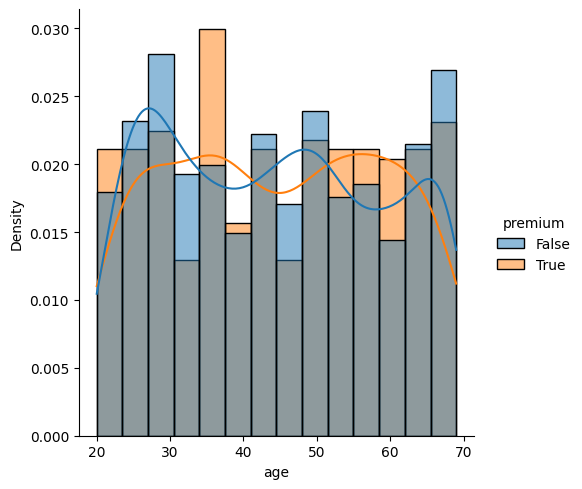

In [89]:
import seaborn as sns
sns.displot(data=premium_logs, x='age', 
            hue='premium', 
            kde=True, 
            kind='hist', 
            stat='density', 
            common_norm=False, 
            bins=14)
sns.despine()

In [90]:
success_counts=logs.query('success==True').client.value_counts()

In [91]:
success_counts=success_counts.rename('successes')

In [92]:
success_counts

client
61473    41
78349    41
36165    41
61468    41
92584    41
         ..
50300     1
51575     1
3553      1
502       1
11983     1
Name: successes, Length: 2845, dtype: int64

<Axes: xlabel='successes', ylabel='count'>

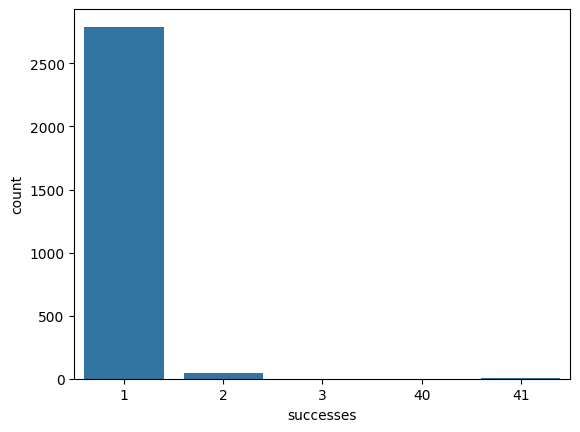

In [93]:
sns.countplot(x=success_counts)

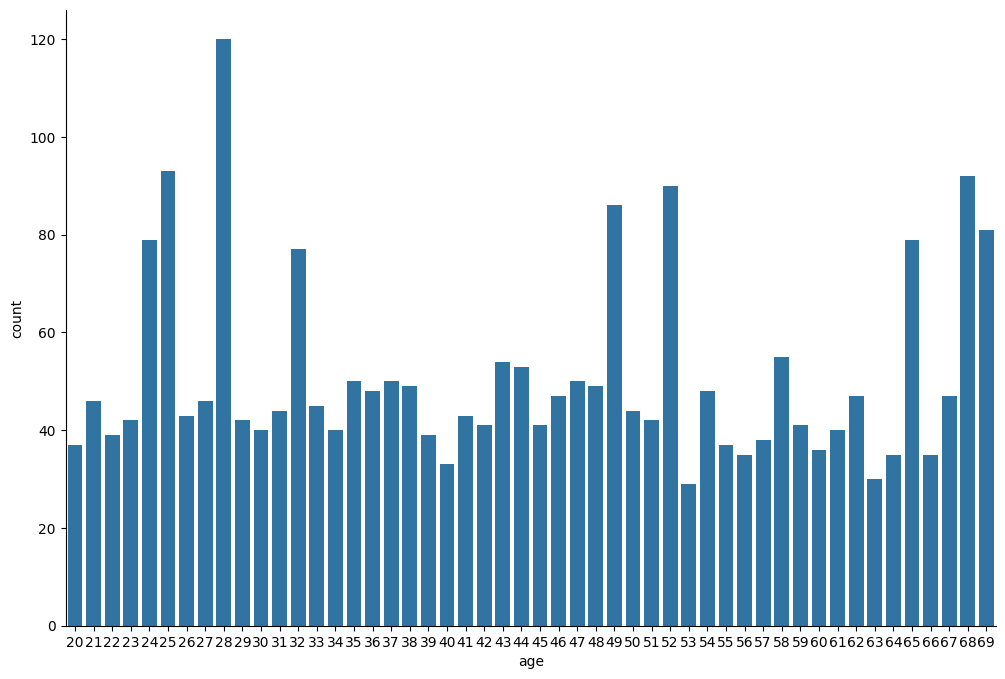

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(data=premium_logs.query(('platform == computer') and ('success == True')), x='age')
sns.despine()